In [1]:
!pip install fasttext
!pip install langdetect
!pip install langid
!pip install pycld3

     |████████████████████████████████| 981 kB 4.9 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=52bb128d784c2c4500364decf25a3e294e83f7ec103431666c73b4690a81787c
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
     |████████████████████████████████| 13.6 MB 3.0 MB/s            


# **Langues supportées**

* **langdetect** supports 55 languages out of the box (ISO 639-1 codes) : af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he, hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl, pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw
* **langid** comes pre-trained on 97 languages (ISO 639-1 codes given) : af, am, an, ar, as, az, be, bg, bn, br, bs, ca, cs, cy, da, de, dz, el, en, eo, es, et, eu, fa, fi, fo, fr, ga, gl, gu, he, hi, hr, ht, hu, hy, id, is, it, ja, jv, ka, kk, km, kn, ko, ku, ky, la, lb, lo, lt, lv, mg, mk, ml, mn, mr, ms, mt, nb, ne, nl, nn, no, oc, or, pa, pl, ps, pt, qu, ro, ru, rw, se, si, sk, sl, sq, sr, sv, sw, ta, te, th, tl, tr, ug, uk, ur, vi, vo, wa, xh, zh, zu
* **fasttext** renvoie le code ISO de la langue la plus probable parmi les 170 langues : af als am an ar arz as ast av az azb ba bar bcl be bg bh bn bo bpy br bs bxr ca cbk ce ceb ckb co cs cv cy da de diq dsb dty dv el eml en eo es et eu fa fi fr frr fy ga gd gl gn gom gu gv he hi hif hr hsb ht hu hy ia id ie ilo io is it ja jbo jv ka kk km kn ko krc ku kv kw ky la lb lez li lmo lo lrc lt lv mai mg mhr min mk ml mn mr mrj ms mt mwl my myv mzn nah nap nds ne new nl nn no oc or os pa pam pfl pl pms pnb ps pt qu rm ro ru rue sa sah sc scn sco sd sh si sk sl so sq sr su sv sw ta te tg th tk tl tr tt tyv ug uk ur uz vec vep vi vls vo wa war wuu xal xmf yi yo yue zh
* **cld3** supporte 107 langues : af am ar bg bg-Latn bn bs ca ceb co cs cy da de el el-Latn en eo es et eu fa fi fil fr fy ga gd gl gu ha haw hi hi-Latn hmn hr ht hu hy id ig is it iw ja ja-Latn jv ka kk km kn ko ku ky la lb lo lt lv mg mi mk ml mn mr ms mt my ne nl no ny pa pl ps pt ro ru ru-Latn sd si sk sl sm sn so sq sr st su sv sw ta te tg th tr uk ur uz vi xh yi yo zh zh-Latn zu

In [2]:
X = ['langdetect', 'langid', 'fasttext', 'cld3']
langs = [55,97, 170, 107]

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison des solutions sur le nombre de langues supportées')

<Figure size 1080x576 with 0 Axes>

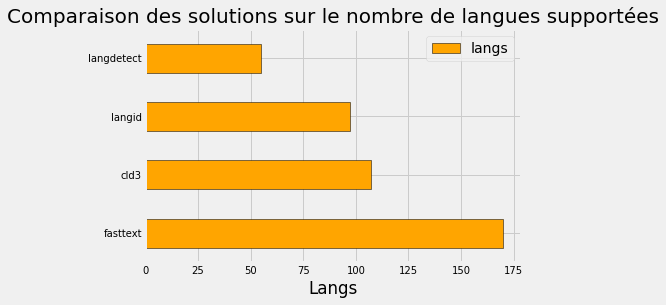

In [4]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'langs': langs})
model_comparison.sort_values('langs', ascending = False).plot(x = 'model', y = 'langs', kind = 'barh', color = 'orange', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Langs')
plt.xticks(size = 10)
plt.title('Comparaison des solutions sur le nombre de langues supportées', size=20)   

# **Précision**

In [5]:
en = "This text is written in English"
fr = "Ce texte est écrit en Français"
es = "Este texto está escrito en español"
it = "Questo testo è scritto in italiano"
zh = "这段文字是用中文写的"
ja = "この文章は日本語で書かれています"
de = "Dieser Text ist auf Deutsch geschrieben"
sv = "Denna text är skriven på svenska"
pl = "Ten tekst jest w języku polskim"
nl = "Deze tekst is geschreven in het Nederlands"
texts = [en, fr, es, it, zh, ja, de, sv, pl, nl]

## **langdetect**

In [6]:
from langdetect import detect_langs
import langdetect

In [7]:
accuracy = []

In [8]:
for text in texts :
    print(detect_langs(text))
    # accuracy.append(detect_langs(text))

[en:0.9999972038678869]
[fr:0.9999980683041829]
[es:0.9999968425384707]
[it:0.9999979921782616]
[zh-cn:0.9999965552474768]
[ja:0.9999993757841568]
[de:0.999997687593735]
[sv:0.9999959371793758]
[pl:0.9999980344784465]
[nl:0.9999962239982207]


## **langid**

In [9]:
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

In [10]:
for text in texts:
    print(identifier.classify(text))

('en', 0.9999999958233259)
('fr', 0.9999999975825273)
('es', 0.7067285616921579)
('it', 1.0)
('zh', 0.9999999999929539)
('ja', 1.0)
('de', 1.0)
('sv', 0.9999999999996949)
('pl', 0.9999999999998621)
('nl', 0.9999999999997848)


## **Fasttext**

In [11]:
!wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2022-02-28 12:05:39--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘/tmp/lid.176.bin’

/tmp/lid.176.bin    100%[===================>] 125.18M  35.1MB/s    in 3.6s    

2022-02-28 12:05:44 (35.1 MB/s) - ‘/tmp/lid.176.bin’ saved [131266198/131266198]



In [12]:
import fasttext

PRETRAINED_MODEL_PATH = '/tmp/lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [13]:
for text in texts:
    prediction = model.predict(text)
    print(prediction)

(('__label__en',), array([0.98926002]))
(('__label__fr',), array([0.99990958]))
(('__label__es',), array([0.97720885]))
(('__label__it',), array([1.00002849]))
(('__label__zh',), array([1.0000397]))
(('__label__ja',), array([1.00000489]))
(('__label__de',), array([0.9999488]))
(('__label__sv',), array([0.99980599]))
(('__label__pl',), array([0.99914205]))
(('__label__nl',), array([0.9972297]))


## **cld3**

In [14]:
import cld3

In [15]:
for text in texts :
    print(cld3.get_language(text))

LanguagePrediction(language='en', probability=0.9996357560157776, is_reliable=True, proportion=1.0)
LanguagePrediction(language='fr', probability=0.9999961853027344, is_reliable=True, proportion=1.0)
LanguagePrediction(language='gl', probability=0.974843442440033, is_reliable=True, proportion=1.0)
LanguagePrediction(language='it', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='zh', probability=0.9999504089355469, is_reliable=True, proportion=1.0)
LanguagePrediction(language='ja', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='de', probability=0.9998397827148438, is_reliable=True, proportion=1.0)
LanguagePrediction(language='sv', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='pl', probability=0.9998817443847656, is_reliable=True, proportion=1.0)
LanguagePrediction(language='nl', probability=0.9999980926513672, is_reliable=True, proportion=1.0)


# **Performance**

In [16]:
X = ['langdetect', 'langid', 'fasttext', 'cld3']
times = []
cpu = []
memory = []

In [17]:
from __future__ import print_function
import time
import psutil
import os

## **Langdetect**

In [18]:
start = time.time()

for text in texts :
    print(detect_langs(text))
    
end = time.time()
times.append(end-start)
cpu.append(psutil.cpu_percent())
pid = os.getpid()
py = psutil.Process(pid)
memory.append(py.memory_info()[0]/2.**30) #  physical memory usage

[en:0.9999975911171972]
[fr:0.9999960793761318]
[es:0.9999955356212775]
[it:0.9999964442470693]
[zh-cn:0.9999967795995066]
[ja:0.9999999362592054]
[de:0.9999976565186786]
[sv:0.9999988481568423]
[pl:0.9999978291797558]
[nl:0.9999964197570864]


## **Langid**

In [19]:
start = time.time()

for text in texts:
    print(identifier.classify(text))
    
end = time.time()
times.append(end-start)
cpu.append(psutil.cpu_percent())
pid = os.getpid()
py = psutil.Process(pid)
memory.append(py.memory_info()[0]/2.**30) #  physical memory usage

('en', 0.9999999958233259)
('fr', 0.9999999975825273)
('es', 0.7067285616921579)
('it', 1.0)
('zh', 0.9999999999929539)
('ja', 1.0)
('de', 1.0)
('sv', 0.9999999999996949)
('pl', 0.9999999999998621)
('nl', 0.9999999999997848)


## **Fasttext**

In [20]:
start = time.time()

for text in texts:
    prediction = model.predict(text)
    print(prediction)
    
end = time.time()
times.append(end-start)
cpu.append(psutil.cpu_percent())
pid = os.getpid()
py = psutil.Process(pid)
memory.append(py.memory_info()[0]/2.**30) #  physical memory usage

(('__label__en',), array([0.98926002]))
(('__label__fr',), array([0.99990958]))
(('__label__es',), array([0.97720885]))
(('__label__it',), array([1.00002849]))
(('__label__zh',), array([1.0000397]))
(('__label__ja',), array([1.00000489]))
(('__label__de',), array([0.9999488]))
(('__label__sv',), array([0.99980599]))
(('__label__pl',), array([0.99914205]))
(('__label__nl',), array([0.9972297]))


## **CLD3**

In [21]:
start = time.time()

for text in texts :
    print(cld3.get_language(text))
    
end = time.time()
times.append(end-start)
cpu.append(psutil.cpu_percent())
pid = os.getpid()
py = psutil.Process(pid)
memory.append(py.memory_info()[0]/2.**30) #  physical memory usage

LanguagePrediction(language='en', probability=0.9996357560157776, is_reliable=True, proportion=1.0)
LanguagePrediction(language='fr', probability=0.9999961853027344, is_reliable=True, proportion=1.0)
LanguagePrediction(language='gl', probability=0.974843442440033, is_reliable=True, proportion=1.0)
LanguagePrediction(language='it', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='zh', probability=0.9999504089355469, is_reliable=True, proportion=1.0)
LanguagePrediction(language='ja', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='de', probability=0.9998397827148438, is_reliable=True, proportion=1.0)
LanguagePrediction(language='sv', probability=1.0, is_reliable=True, proportion=1.0)
LanguagePrediction(language='pl', probability=0.9998817443847656, is_reliable=True, proportion=1.0)
LanguagePrediction(language='nl', probability=0.9999980926513672, is_reliable=True, proportion=1.0)


## **Visualisation**

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

['langdetect', 'langid', 'fasttext', 'cld3']
[0.033472537994384766, 0.03687167167663574, 0.0042994022369384766, 0.003327608108520508]
[23.9, 32.4, 50.7, 25.8]
[0.4186363220214844, 0.42304229736328125, 0.42304229736328125, 0.42304229736328125]


<Figure size 1080x576 with 0 Axes>

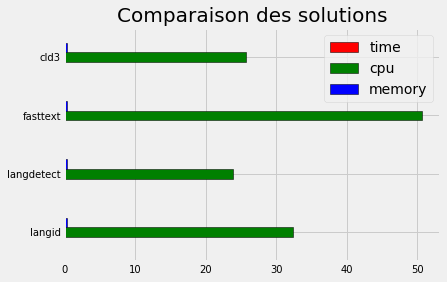

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': times, 'cpu': cpu, 'memory': memory})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = ['time', 'cpu', 'memory'], kind = 'barh', color = 'rgb', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('')
plt.xticks(size = 10)
plt.title('Comparaison des solutions', size=20)
print(X)
print(times)
print(cpu)
print(memory)

['langdetect', 'langid', 'fasttext', 'cld3']
[0.033472537994384766, 0.03687167167663574, 0.0042994022369384766, 0.003327608108520508]


<Figure size 1080x576 with 0 Axes>

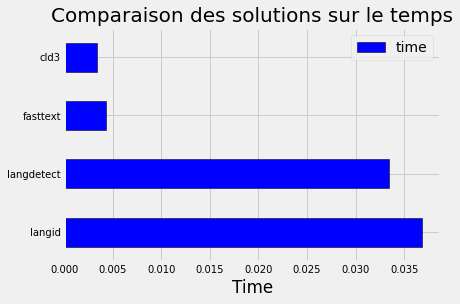

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': times})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y ='time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Time')
plt.xticks(size = 10)
plt.title('Comparaison des solutions sur le temps', size=20) 
print(X)
print(times)

['langdetect', 'langid', 'fasttext', 'cld3']
[0.4186363220214844, 0.42304229736328125, 0.42304229736328125, 0.42304229736328125]


<Figure size 1080x576 with 0 Axes>

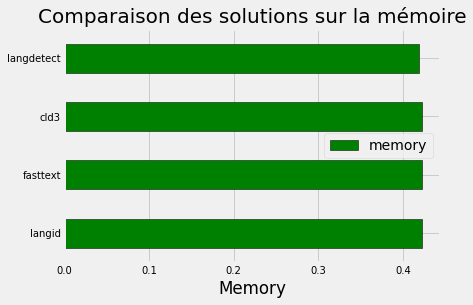

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'memory': memory})
model_comparison.sort_values('memory', ascending = False).plot(x = 'model', y ='memory', kind = 'barh', color = 'green', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Memory')
plt.xticks(size = 10)
plt.title('Comparaison des solutions sur la mémoire', size=20)  
print(X)
print(memory)

['langdetect', 'langid', 'fasttext', 'cld3']
[23.9, 32.4, 50.7, 25.8]


<Figure size 1080x576 with 0 Axes>

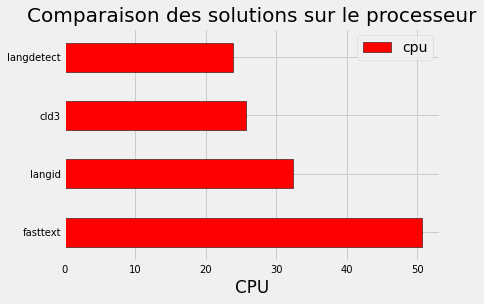

In [26]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'cpu': cpu})
model_comparison.sort_values('cpu', ascending = False).plot(x = 'model', y ='cpu', kind = 'barh', color = 'red', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('CPU')
plt.xticks(size = 10)
plt.title('Comparaison des solutions sur le processeur', size=20)  
print(X)
print(cpu)